In [8]:
# vaccination uptake spatial

In [9]:
%%capture
!pip install geopandas mapclassify

In [10]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
from google.colab import drive

Data
==

GDrive mount
--

In [13]:
drive.mount('/content/gdrive')

ValueError: ignored

In [14]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
vacc_uptake_dir = f"{project_dir}/covid_vaccination_uptake"

# Outputs
out_dir = f"{project_dir}/covid_vaccination_uptake"

In [15]:
!mkdir -p "{out_dir}"

In [16]:
!ls -lh "{oa_dir}"/*msoa*.gpkg

ls: cannot access '/content/gdrive/MyDrive/WardProfiles/boundaries/oa/*msoa*.gpkg': No such file or directory


In [4]:
!ls -lh "{ward_dir}"/*.gpkg

ls: cannot access '/content/gdrive/MyDrive/WardProfiles/boundaries/2022_wards/*.gpkg': No such file or directory


In [5]:
#!ls -lh "{vacc_uptake_dir}" 

Ward & MSOA geometry
--

In [6]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

NameError: ignored

In [ ]:
# OA geometry
msoa11 = gpd.read_file(f"{oa_dir}/lbl_msoa11_20m.gpkg")
len(msoa11)

36

Vaccine uptake data & geometry at MSOA level for Lewisham
==

First dose uptake
--

In [ ]:
# First dose
df1 = pd.read_csv(f"{vacc_uptake_dir}/lbl_vacc_uptake_1st_pc_msoa11.csv")
print(len(df1))
df1.head()

36


,MSOA11CD,MSOA11NM,LAD19CD,LAD19NM,date,vacc_uptake_1st_pc,WD22CD_proposed
0,E02000653,Silwood & Pepys,E09000023,Lewisham,2021-12-19,63.7,E05013721
1,E02000654,Deptford North,E09000023,Lewisham,2021-12-19,60.7,E05013719
2,E02000655,New Cross Gate,E09000023,Lewisham,2021-12-19,62.0,E05013728
3,E02000657,New Cross South,E09000023,Lewisham,2021-12-19,63.0,E05013716
4,E02000658,Telegraph Hill,E09000023,Lewisham,2021-12-19,66.4,E05013732


In [ ]:
first_vacc_geom = msoa11.merge(df1, on='MSOA11CD')
print(len(first_vacc_geom))
first_vacc_geom.head()

36


,OBJECTID,MSOA11CD,MSOA11NM_x,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,MSOA11NM_y,LAD19CD,LAD19NM,date,vacc_uptake_1st_pc,WD22CD_proposed
0,632,E02000653,Lewisham 001,Lewisham 001,536028,178459,-0.04212,51.48872,672030.020294,5389.347297,"POLYGON ((536716.134 178900.112, 536803.043 17...",Silwood & Pepys,E09000023,Lewisham,2021-12-19,63.7,E05013721
1,633,E02000654,Lewisham 002,Lewisham 002,536585,177917,-0.03431,51.48372,940263.235817,5354.425393,"POLYGON ((536928.231 178476.081, 537045.215 17...",Deptford North,E09000023,Lewisham,2021-12-19,60.7,E05013719
2,634,E02000655,Lewisham 003,Lewisham 003,535814,177350,-0.04563,51.47881,980030.041916,5490.396084,"POLYGON ((535467.624 178371.485, 535927.109 17...",New Cross Gate,E09000023,Lewisham,2021-12-19,62.0,E05013728
3,635,E02000657,Lewisham 005,Lewisham 005,536845,176526,-0.03111,51.47115,872806.974403,5022.335957,"POLYGON ((537413.813 176909.156, 537424.375 17...",New Cross South,E09000023,Lewisham,2021-12-19,63.0,E05013716
4,636,E02000658,Lewisham 006,Lewisham 006,535840,176571,-0.04555,51.47180,774714.455208,4277.659461,"POLYGON ((535804.890 176848.797, 535842.445 17...",Telegraph Hill,E09000023,Lewisham,2021-12-19,66.4,E05013732


In [ ]:
print(first_vacc_geom.vacc_uptake_1st_pc.max())

75.7


In [ ]:
print(first_vacc_geom.vacc_uptake_1st_pc.min())

60.7


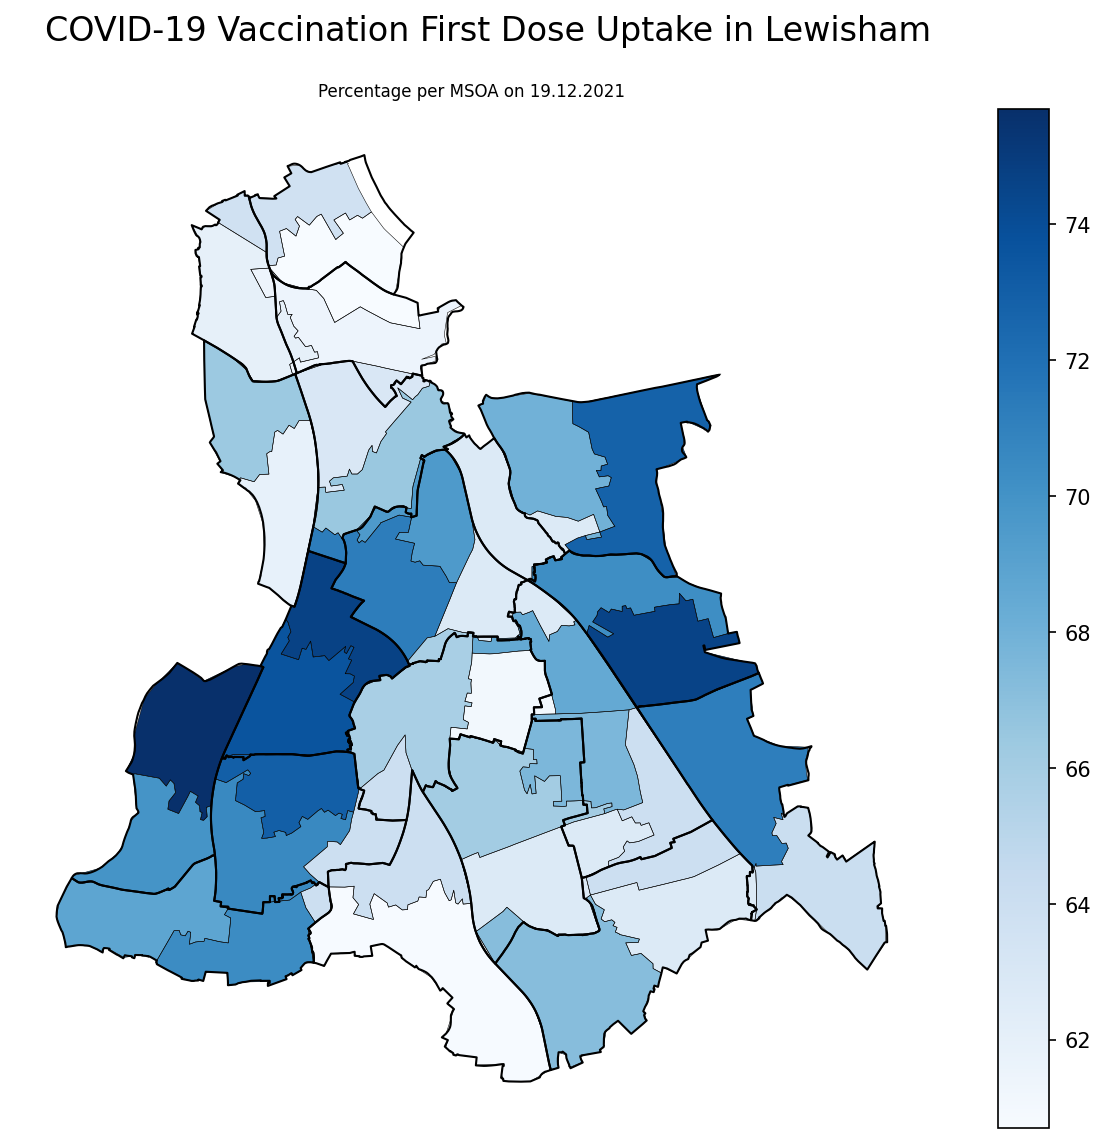

In [ ]:
# Plot 1st vaccination dose uptake
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('COVID-19 Vaccination First Dose Uptake in Lewisham', fontsize=16, y=.95)
plt.title('Percentage per MSOA on 19.12.2021', fontsize=8)
first_vacc_geom.plot(ax=ax, column="vacc_uptake_1st_pc", cmap=plt.cm.Blues, legend=True) 

msoa11.plot(ax=ax, facecolor='none', linewidth=0.25, edgecolor='black')
ax.set_axis_off()
wd22.plot(ax=ax, facecolor='none', linewidth=1, edgecolor='black')

plt.savefig(f"{out_dir}/lbl_msoa11_wd22_first_vacc_uptake.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_msoa11_wd22_first_vacc_uptake.pdf")


Second dose uptake
--

In [ ]:
# Second dose
df2 = pd.read_csv(f"{vacc_uptake_dir}/lbl_vacc_uptake_2nd_pc_msoa11.csv")
print(len(df2))
df2.head()

36


,MSOA11CD,MSOA11NM,LAD19CD,LAD19NM,date,vacc_uptake_2nd_pc,WD22CD_proposed
0,E02000653,Silwood & Pepys,E09000023,Lewisham,2021-12-19,58.0,E05013721
1,E02000654,Deptford North,E09000023,Lewisham,2021-12-19,54.5,E05013719
2,E02000655,New Cross Gate,E09000023,Lewisham,2021-12-19,55.6,E05013728
3,E02000657,New Cross South,E09000023,Lewisham,2021-12-19,56.7,E05013716
4,E02000658,Telegraph Hill,E09000023,Lewisham,2021-12-19,61.1,E05013732


In [ ]:
second_vacc_geom = msoa11.merge(df2, on='MSOA11CD')
print(len(second_vacc_geom))
second_vacc_geom.head()

36


,OBJECTID,MSOA11CD,MSOA11NM_x,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,MSOA11NM_y,LAD19CD,LAD19NM,date,vacc_uptake_2nd_pc,WD22CD_proposed
0,632,E02000653,Lewisham 001,Lewisham 001,536028,178459,-0.04212,51.48872,672030.020294,5389.347297,"POLYGON ((536716.134 178900.112, 536803.043 17...",Silwood & Pepys,E09000023,Lewisham,2021-12-19,58.0,E05013721
1,633,E02000654,Lewisham 002,Lewisham 002,536585,177917,-0.03431,51.48372,940263.235817,5354.425393,"POLYGON ((536928.231 178476.081, 537045.215 17...",Deptford North,E09000023,Lewisham,2021-12-19,54.5,E05013719
2,634,E02000655,Lewisham 003,Lewisham 003,535814,177350,-0.04563,51.47881,980030.041916,5490.396084,"POLYGON ((535467.624 178371.485, 535927.109 17...",New Cross Gate,E09000023,Lewisham,2021-12-19,55.6,E05013728
3,635,E02000657,Lewisham 005,Lewisham 005,536845,176526,-0.03111,51.47115,872806.974403,5022.335957,"POLYGON ((537413.813 176909.156, 537424.375 17...",New Cross South,E09000023,Lewisham,2021-12-19,56.7,E05013716
4,636,E02000658,Lewisham 006,Lewisham 006,535840,176571,-0.04555,51.47180,774714.455208,4277.659461,"POLYGON ((535804.890 176848.797, 535842.445 17...",Telegraph Hill,E09000023,Lewisham,2021-12-19,61.1,E05013732


In [ ]:
print(second_vacc_geom.vacc_uptake_2nd_pc.max())

69.2


In [ ]:
print(second_vacc_geom.vacc_uptake_2nd_pc.min())

53.6


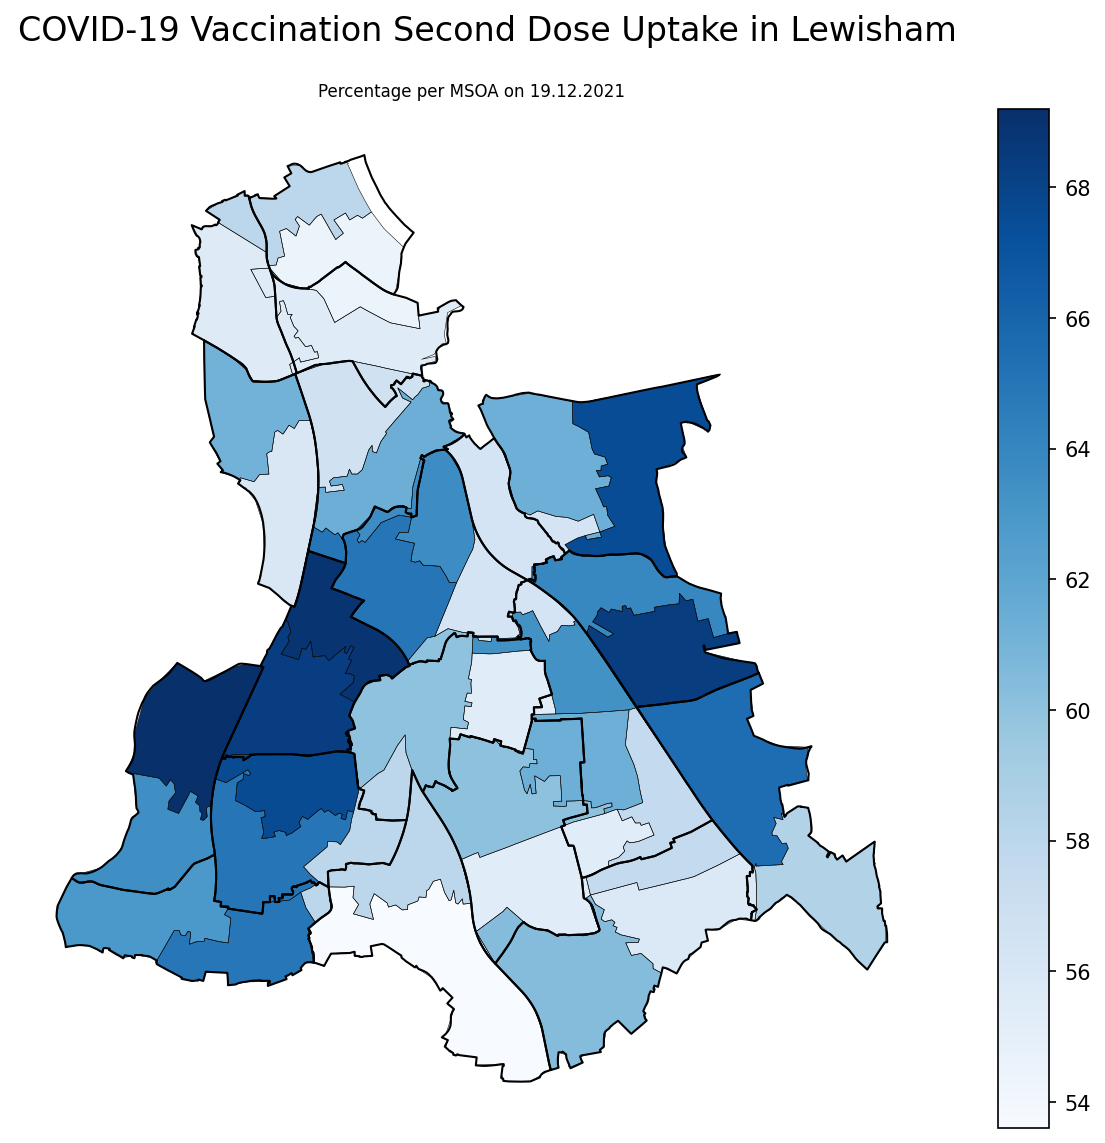

In [ ]:
# Plot 2ndt vaccination dose uptake
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('COVID-19 Vaccination Second Dose Uptake in Lewisham', fontsize=16, y=.95)
plt.title('Percentage per MSOA on 19.12.2021', fontsize=8)
second_vacc_geom.plot(ax=ax, column="vacc_uptake_2nd_pc", cmap=plt.cm.Blues, legend=True) 

msoa11.plot(ax=ax, facecolor='none', linewidth=0.25, edgecolor='black')
ax.set_axis_off()
wd22.plot(ax=ax, facecolor='none', linewidth=1, edgecolor='black')

plt.savefig(f"{out_dir}/lbl_msoa11_wd22_second_vacc_uptake.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_msoa11_wd22_second_vacc_uptake.pdf")



Third dose uptake
--

In [ ]:
# Third dose
df3 = pd.read_csv(f"{vacc_uptake_dir}/lbl_vacc_uptake_3rd_pc_msoa11.csv")
print(len(df3))
df3.head()

36


,MSOA11CD,MSOA11NM,LAD19CD,LAD19NM,date,vacc_uptake_3rd_pc,WD22CD_proposed
0,E02000653,Silwood & Pepys,E09000023,Lewisham,2021-12-19,23.7,E05013721
1,E02000654,Deptford North,E09000023,Lewisham,2021-12-19,23.7,E05013719
2,E02000655,New Cross Gate,E09000023,Lewisham,2021-12-19,23.8,E05013728
3,E02000657,New Cross South,E09000023,Lewisham,2021-12-19,26.1,E05013716
4,E02000658,Telegraph Hill,E09000023,Lewisham,2021-12-19,31.1,E05013732


In [ ]:
third_vacc_geom = msoa11.merge(df3, on='MSOA11CD')
print(len(third_vacc_geom))
third_vacc_geom.head()

36


,OBJECTID,MSOA11CD,MSOA11NM_x,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,MSOA11NM_y,LAD19CD,LAD19NM,date,vacc_uptake_3rd_pc,WD22CD_proposed
0,632,E02000653,Lewisham 001,Lewisham 001,536028,178459,-0.04212,51.48872,672030.020294,5389.347297,"POLYGON ((536716.134 178900.112, 536803.043 17...",Silwood & Pepys,E09000023,Lewisham,2021-12-19,23.7,E05013721
1,633,E02000654,Lewisham 002,Lewisham 002,536585,177917,-0.03431,51.48372,940263.235817,5354.425393,"POLYGON ((536928.231 178476.081, 537045.215 17...",Deptford North,E09000023,Lewisham,2021-12-19,23.7,E05013719
2,634,E02000655,Lewisham 003,Lewisham 003,535814,177350,-0.04563,51.47881,980030.041916,5490.396084,"POLYGON ((535467.624 178371.485, 535927.109 17...",New Cross Gate,E09000023,Lewisham,2021-12-19,23.8,E05013728
3,635,E02000657,Lewisham 005,Lewisham 005,536845,176526,-0.03111,51.47115,872806.974403,5022.335957,"POLYGON ((537413.813 176909.156, 537424.375 17...",New Cross South,E09000023,Lewisham,2021-12-19,26.1,E05013716
4,636,E02000658,Lewisham 006,Lewisham 006,535840,176571,-0.04555,51.47180,774714.455208,4277.659461,"POLYGON ((535804.890 176848.797, 535842.445 17...",Telegraph Hill,E09000023,Lewisham,2021-12-19,31.1,E05013732


In [ ]:
print(third_vacc_geom.vacc_uptake_3rd_pc.max())

42.0


In [ ]:
print(third_vacc_geom.vacc_uptake_3rd_pc.min())

23.7


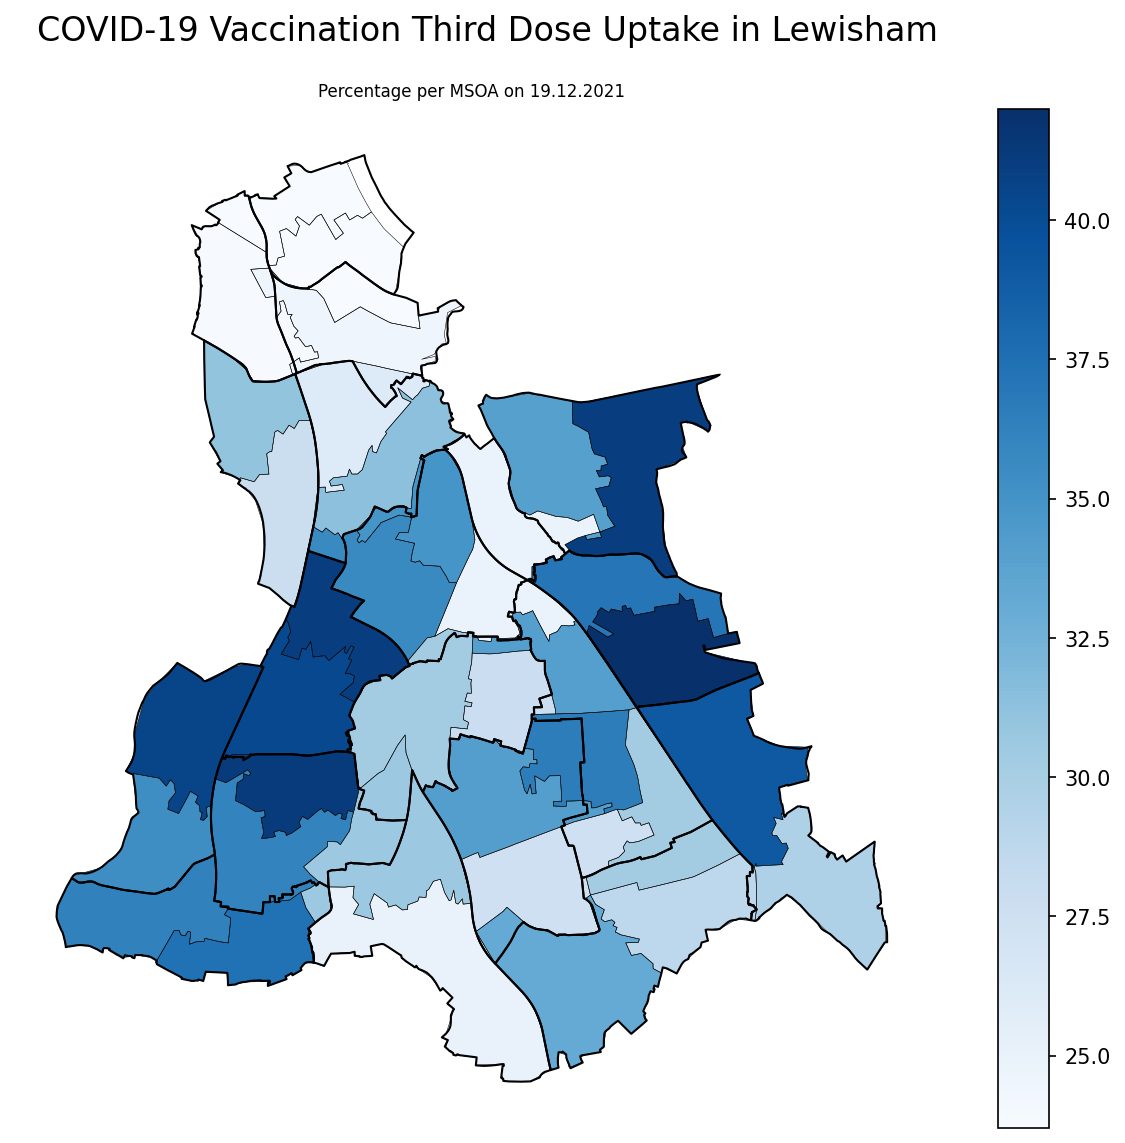

In [ ]:
# Plot 3rd vaccination dose uptake
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('COVID-19 Vaccination Third Dose Uptake in Lewisham', fontsize=16, y=.95)
plt.title('Percentage per MSOA on 19.12.2021', fontsize=8)
third_vacc_geom.plot(ax=ax, column="vacc_uptake_3rd_pc", cmap=plt.cm.Blues, legend=True) 

msoa11.plot(ax=ax, facecolor='none', linewidth=0.25, edgecolor='black')
ax.set_axis_off()
wd22.plot(ax=ax, facecolor='none', linewidth=1, edgecolor='black')

plt.savefig(f"{out_dir}/lbl_msoa11_wd22_third_vacc_uptake.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_msoa11_wd22_third_vacc_uptake.pdf")
